# Introduction


```yaml
-
    name: Create users
    hosts: localhost
    tasks:
        - user: name=joe state=present
```

Let's look at this example where we are creating an Ansible playbook to create users in a system using the `user` module.

The `user` module helps you create users on the target systems.
* In this case, we are creating only one user.
* ***But what if we have multiple users?***
* ***What if we have a lot of users to create?***

Well, one way to do this would be to duplicate these lines as many times as required.

But that is not very elegant, and there is a lot of duplication.

```yaml
-
    name: Create users
    hosts: localhost
    tasks:
        - user: name=joe state=present
        - user: name=george state=present
        - user: name=ravi state=present
        - user: name=mani state=present
        - user: name=kiran state=present
        - user: name=jazlan state=present
        - user: name=emaan state=present
        - user: name=mazin state=present
        - user: name=izaan state=present
        - user: name=mike state=present
        - user: name=menaal state=present
        - user: name=shoeb state=present
        - user: name=rani state=present
```
  
A better way to do this would be to have **a single task loop over all the users**.

That's where we use **loops**.
* The **loop** is a **looping directive** that executes the same task multiple times.
* Each time it runs, it stores the value of each item in the loop in a variable named **"`item`"**.
* So you can simply replace the user name, in this case `Joe`, with the `item` variable inside **double braces** as shown.
* This makes your playbooks much more organized and with reduced repetition.
* In this case, you are not repeating the lines of the user module or the state.

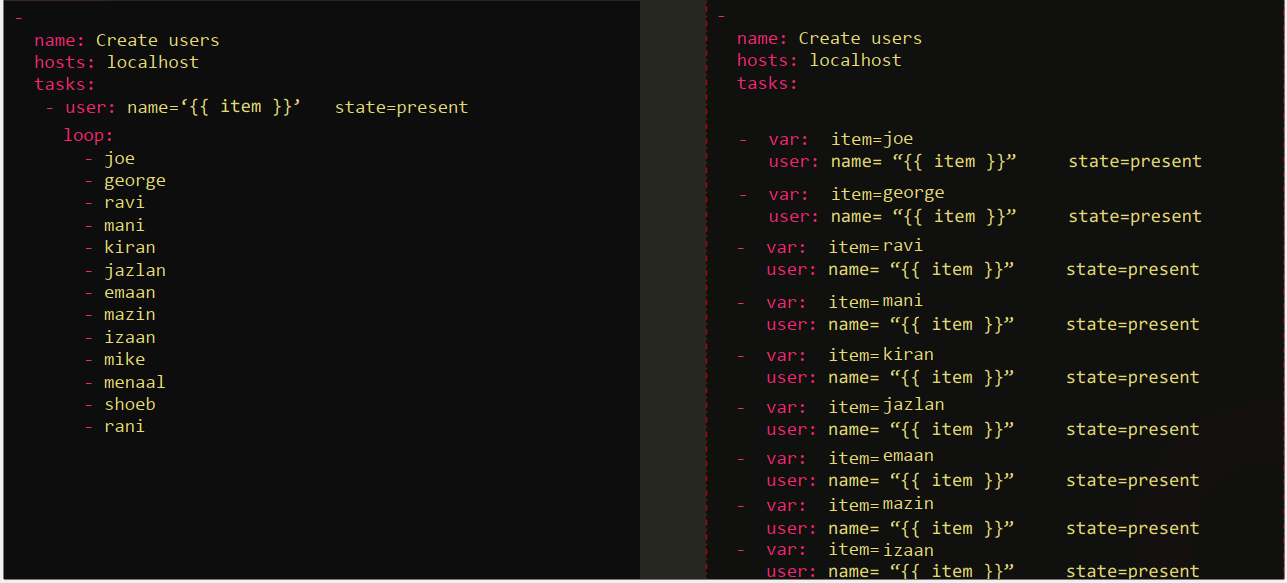

If you didn't get how the part about the `item` works, let's visualize it.

For visualization purposes:
* a loop would break down into multiple tasks; 
* Within each task, you have a variable defined, which is by default named "`item`".
* The `item` variable has the value of each item of the `loop` list.
* In this case, the `loop` is an **array of string** values.

# Loop with Complex Values - `array of dictionary`

In the previous example, the `loop` was an **array of string** values, that is, each `item` in the loop is a single string value - username.

* ***But what if I want to specify the **user-id** as well, along with the username?***
    * That would mean each `item` in the loop would have to have two values: the **username** and **user-id**.
* ***But how do we pass two values in an array?***
    * Instead of passing in an **array of strings** through the loop, we would pass in an **array of dictionaries**.
    * Each dictionary will have two key-value pairs.
    * The keys would be `name` and `uid`, and the values would be the respective **username** and **user-id** of each user.

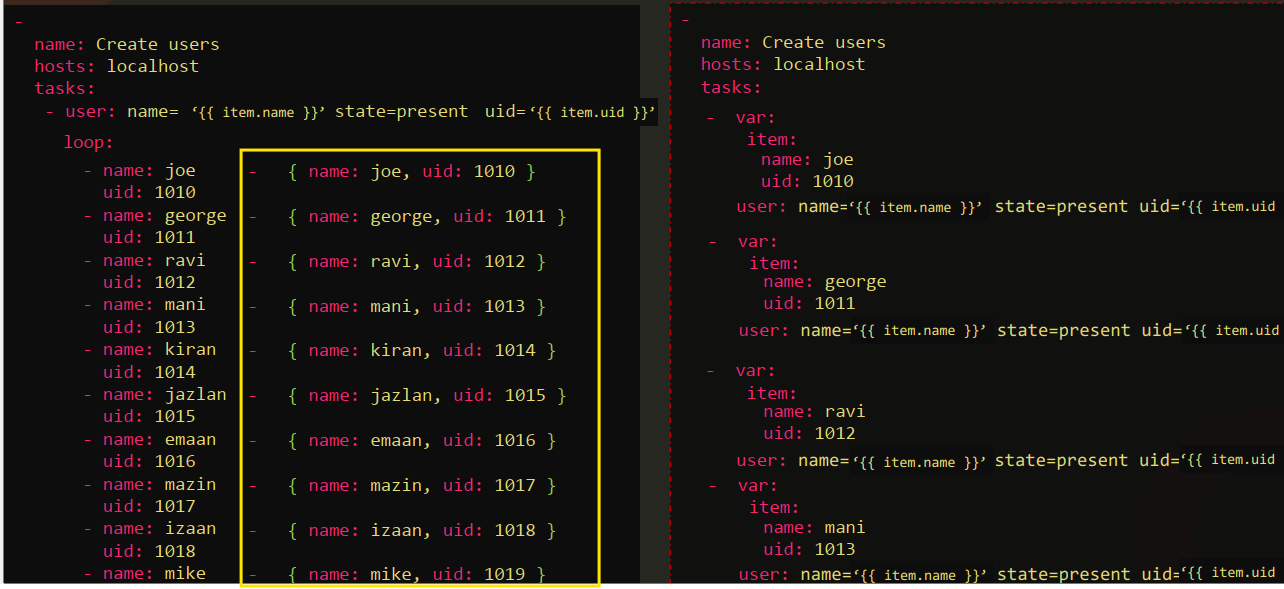

With an array of dictionaries, remember that you could simply use `item.property_name` in the dictionary to get an item within each dictionary in the list.

Also note that an array of dictionaries can also be represented in a JSON format as shown above.

> * The loop directive we just saw is used to ***create simple loops that iterate over a lot of items***.
> * There's another way to create loops in playbooks.
> * That is, using the `with_*` directives.

# `with_*` directives

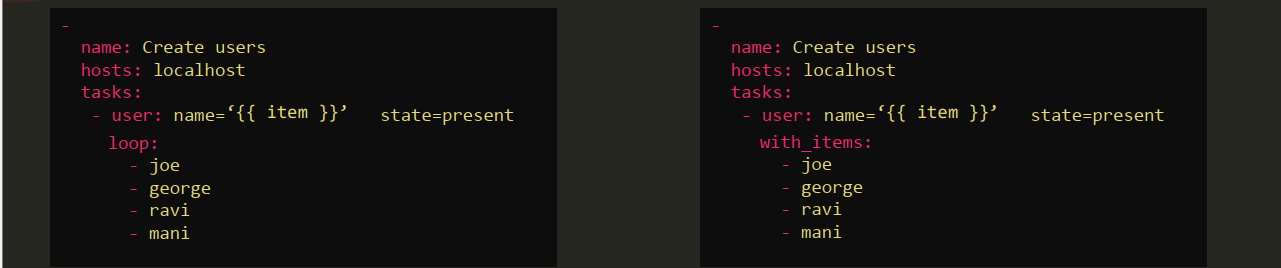

The playbook that we developed can also be written using the `with_items` directive like this.
* In fact, the `loop` directive is newly added in Ansible.
* In the past, we just had the `with_items` directive.

In this case, both playbooks yield the same results, and there is not much difference between the two.
* For simple loops like the ones we have been working on, it is recommended to use the `loop` directive itself.
* However, in some of the older playbooks, you might come across the `with_items` directive, so you should understand what that means when you see that.

# Advantage of `with_*` directives

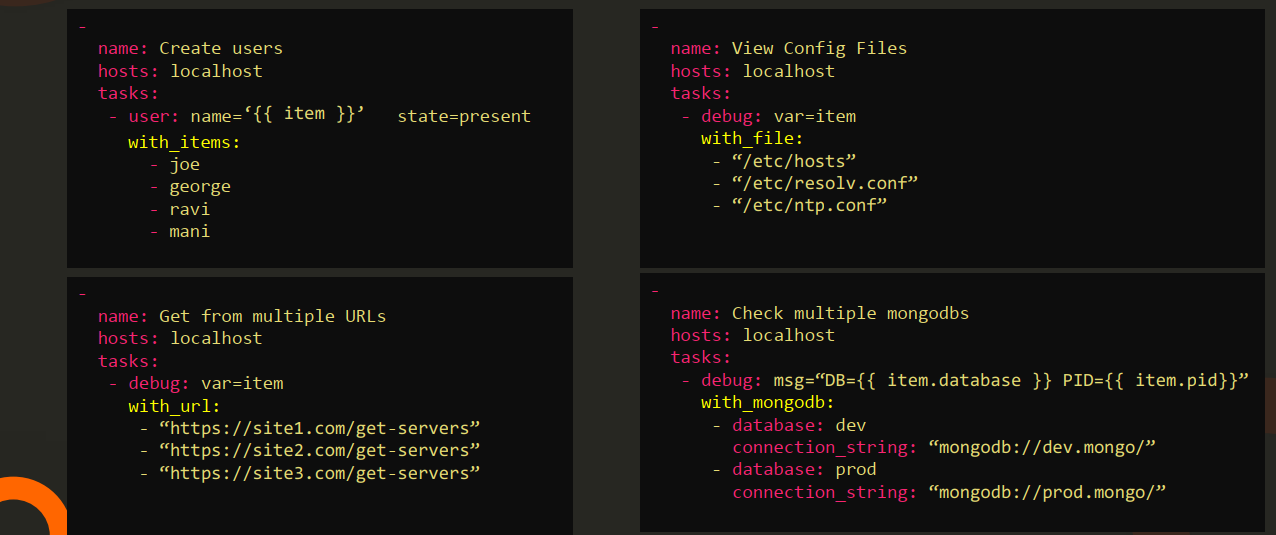

Now, let's look at the advantage of the with directives.

* The `with_items` just iterates over a list of items.
* We have other directives, such as:
    * `with_files` that iterate over multiple files,
    * `with_url` that connects to multiple URLs,
    * `with_mongodb` that connects to multiple MongoDB databases, etc.


***Are these all, or are there more?*** 

***If so, how many are there?***

* It so happens that these are just a few among the many with directives available.
* In fact, everything you see after the `with_` string is a **lookup plugin**.
* So whatever **look-up plugin** you have or you create, you can use `with_` with that.


# Lookup Plugins

***What are look-up plugins?***

Just think of them as custom scripts that can do specific tasks like:
* read files,
* connect to a URL,
* or, connect to a database,
* or, connect to other systems like Copernicus or OpenShift.

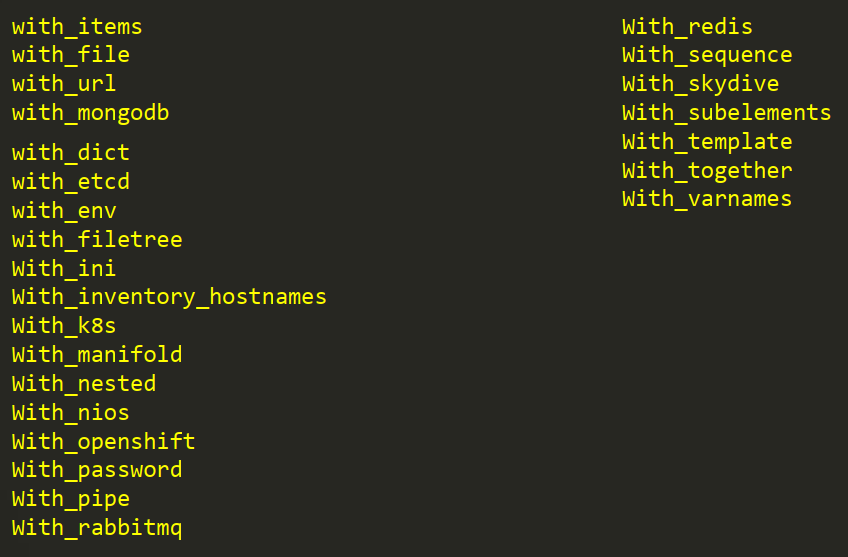